In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
mpl.style.use('ggplot')

In [0]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
df = pd.read_excel(path, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [7]:
df.head(4)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# preprocess
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [0]:
df.drop(['AREA', 'DEV', 'REG', 'Type', 'Coverage'], axis = 1, inplace=True)
df.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis = 1)
years = list(map(str, range(1980, 2014)))

In [52]:
df.sort_values(['Total'], ascending=False, axis = 0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


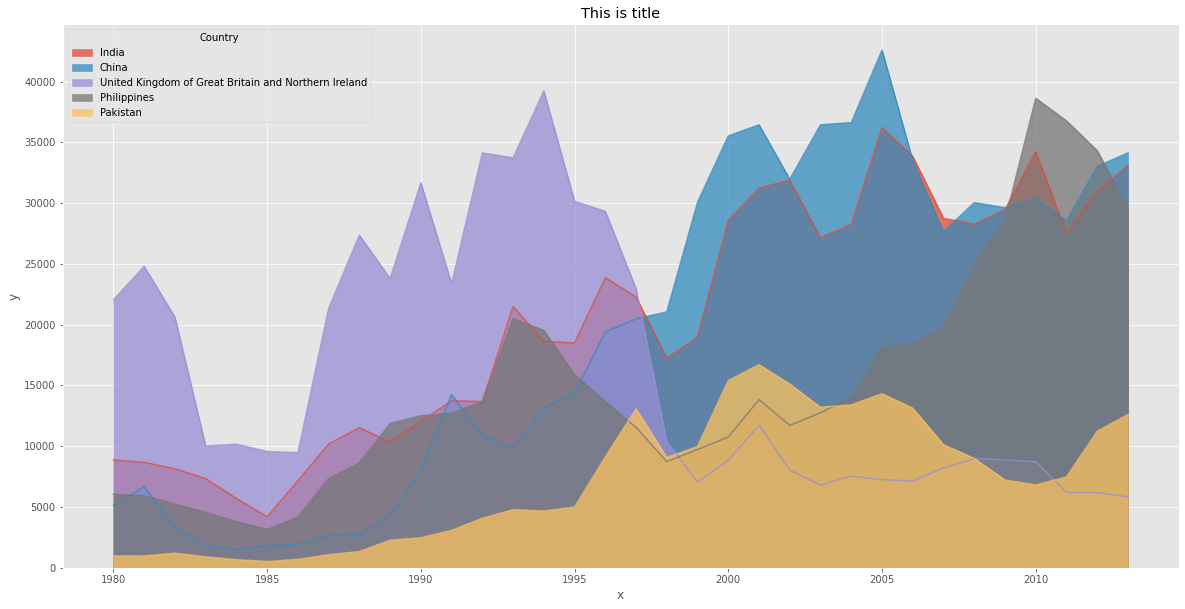

In [17]:
# area plot
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area',
             alpha = 0.75,
             stacked = False,
             figsize=(20, 10))
plt.title('This is title')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [18]:
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [0]:
import numpy as np

In [20]:
#histogram
count, bin_edges = np.histogram(df['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


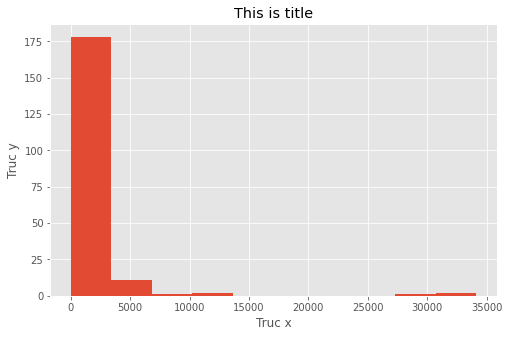

In [21]:
df['2013'].plot(kind = 'hist', figsize = (8, 5))
plt.title('This is title')
plt.ylabel('Truc y')
plt.xlabel('Truc x')
plt.show()

In [0]:
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [31]:
count, bin_edges = np.histogram(df_t, 15)
print(count)
print(bin_edges)

[ 5 13 21 14  9 10  5  9  7  3  1  0  0  2  3]
[ 31.          49.46666667  67.93333333  86.4        104.86666667
 123.33333333 141.8        160.26666667 178.73333333 197.2
 215.66666667 234.13333333 252.6        271.06666667 289.53333333
 308.        ]


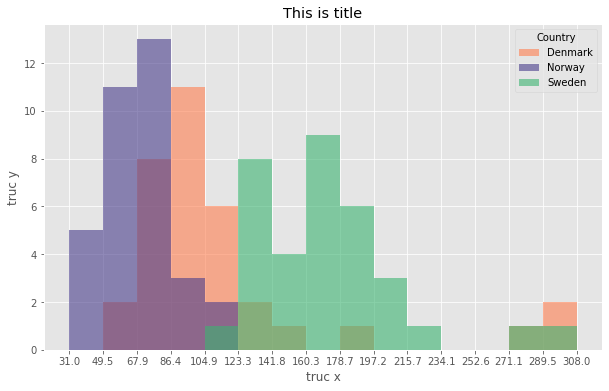

In [32]:
df_t.plot(kind = 'hist', figsize=(10, 6), bins = 15, alpha = .6, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('This is title')
plt.ylabel('truc y')
plt.xlabel('truc x')
plt.show()

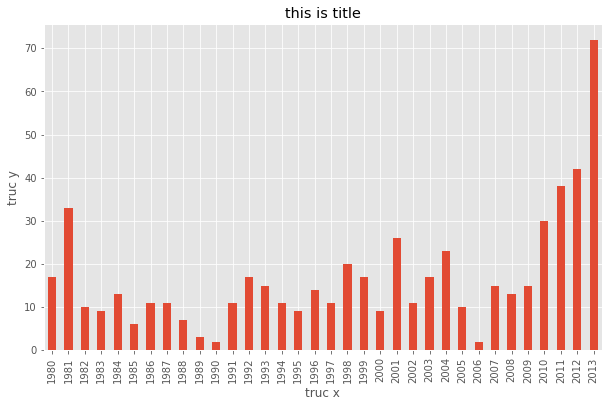

In [34]:
#bar charts
df_iceland = df.loc['Iceland', years]
df_iceland.plot(kind = 'bar', figsize=(10, 6))
plt.xlabel('truc x')
plt.ylabel('truc y')
plt.title('this is title')
plt.show()

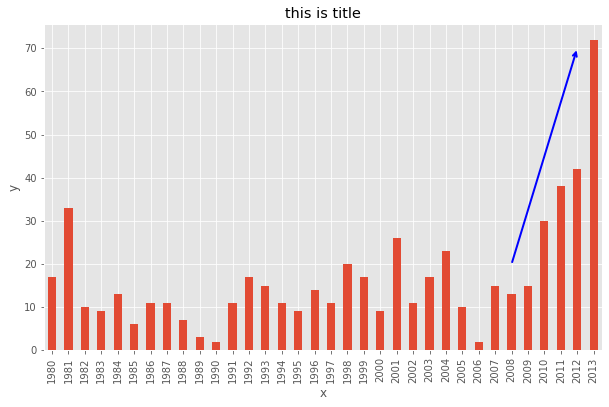

In [40]:
df_iceland.plot(kind = 'bar', figsize = (10, 6), rot = 90)
plt.xlabel('x')
plt.ylabel('y')
plt.title('this is title')
plt.annotate('', xy=(32,70),xytext=(28, 20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

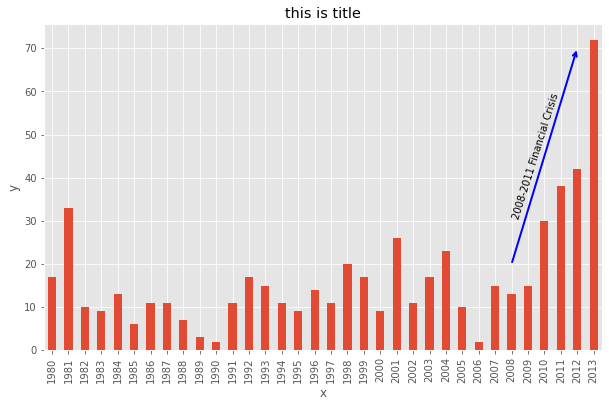

In [41]:
df_iceland.plot(kind = 'bar', figsize = (10, 6), rot = 90)
plt.xlabel('x')
plt.ylabel('y')
plt.title('this is title')
plt.annotate('', xy=(32,70),xytext=(28, 20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('2008-2011 Financial Crisis',
             xy = (28, 30), rotation=72.5, va='bottom', ha='left')
plt.show()


94,486
98,048
107,333
109,992
116,261
140,142
143,483
149,260
176,825
242,023
242,502
512,293
552,401
660,864
692,806


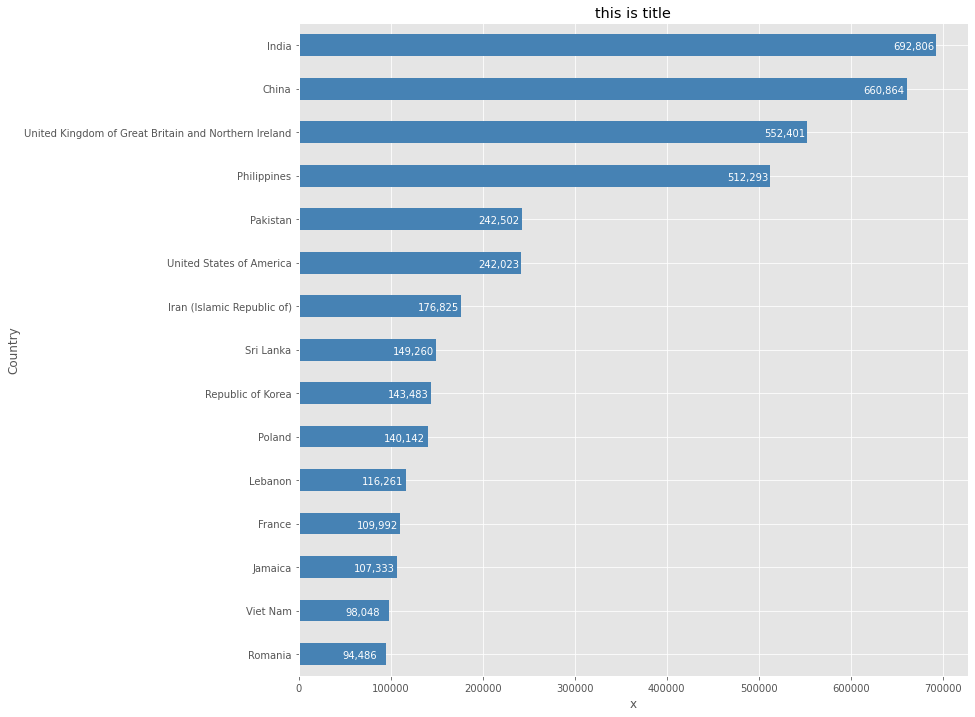

In [47]:
df.sort_values(['Total'], ascending=True, axis = 0, inplace=True)
df_top15 = df['Total'].tail(15)
df_top15.plot(kind = 'barh', figsize=(12, 12), color='steelblue')
plt.xlabel('x')
plt.title('this is title')
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

In [55]:
#pie chart
df_continents = df.groupby('Continent', axis = 0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [0]:
df_continents['Total'].plot(kind='pie', figsize=(5, 6), autopct='%1.1f%%', startangle=90, shadow=)